# BREAST CANCER CLASSIFICATION

## PROBLEM STATEMENT
- Predicting if the cancer diagnosis is benign or malignant based on several observations/features

-  30 features are used, examples: - radius (mean of distances from center to points on the perimeter) - texture (standard deviation of gray-scale values) - perimeter - area - smoothness (local variation in radius lengths) - compactness (perimeter^2 / area - 1.0) - concavity (severity of concave portions of the contour) - concave points (number of concave portions of the contour) - symmetry - fractal dimension ("coastline approximation" - 1)

- Number of Instances: 569

- Class Distribution: 212 Malignant, 357 Benign

- Target class: - Malignant - Benign

## IMPORTING THE DATA

In [ ]:
# IMPORTING LIBRARIES
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# importing data
data=pd.read_csv("/content/Cancer_Data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#drop unnecessary columns
data1=data.drop(columns = ["id"],axis=1)
data1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
# checking null values
data1.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [ ]:
# droping unnecessary columns
data1.drop(columns = ["Unnamed: 32"],inplace=True)
data1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# using label encoding to encode the diagnosis column 1- M ,0 -B
enc = LabelEncoder()
enc_data=enc.fit_transform(data1["diagnosis"])
data1["Diagnosis"]=enc_data
data1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [ ]:
# drop the original diagnosis column as we have encoded it in diffrent column
data2=data1.drop(columns = ["diagnosis"],axis=1)
data2

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [ ]:
# checking the duplicate values
data2.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

## Vizulisation of data

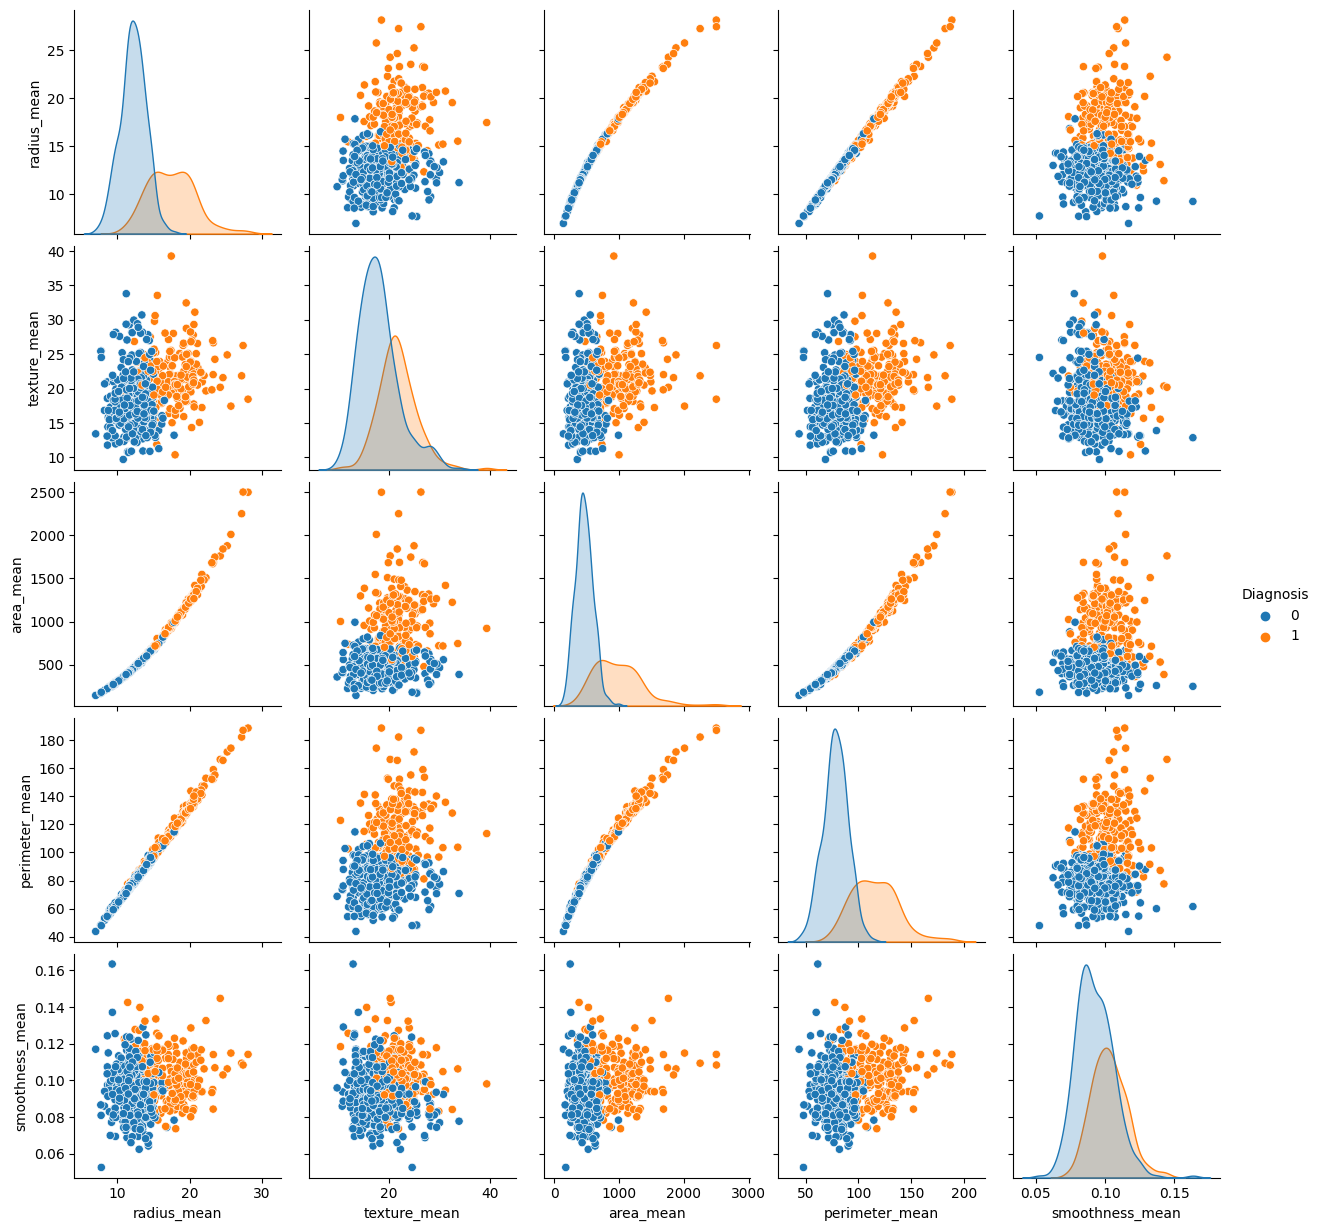

In [ ]:
sn.pairplot(data2, hue = 'Diagnosis', vars = ['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean', 'smoothness_mean'] )

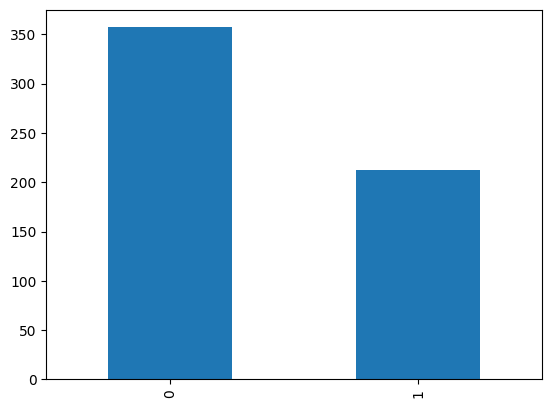

In [ ]:

_ = data2['Diagnosis'].value_counts().plot(kind='bar')
plt.show()

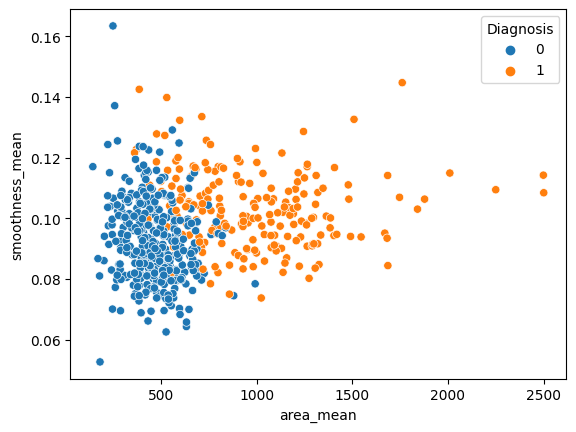

In [ ]:
sn.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'Diagnosis', data = data2)
plt.show()

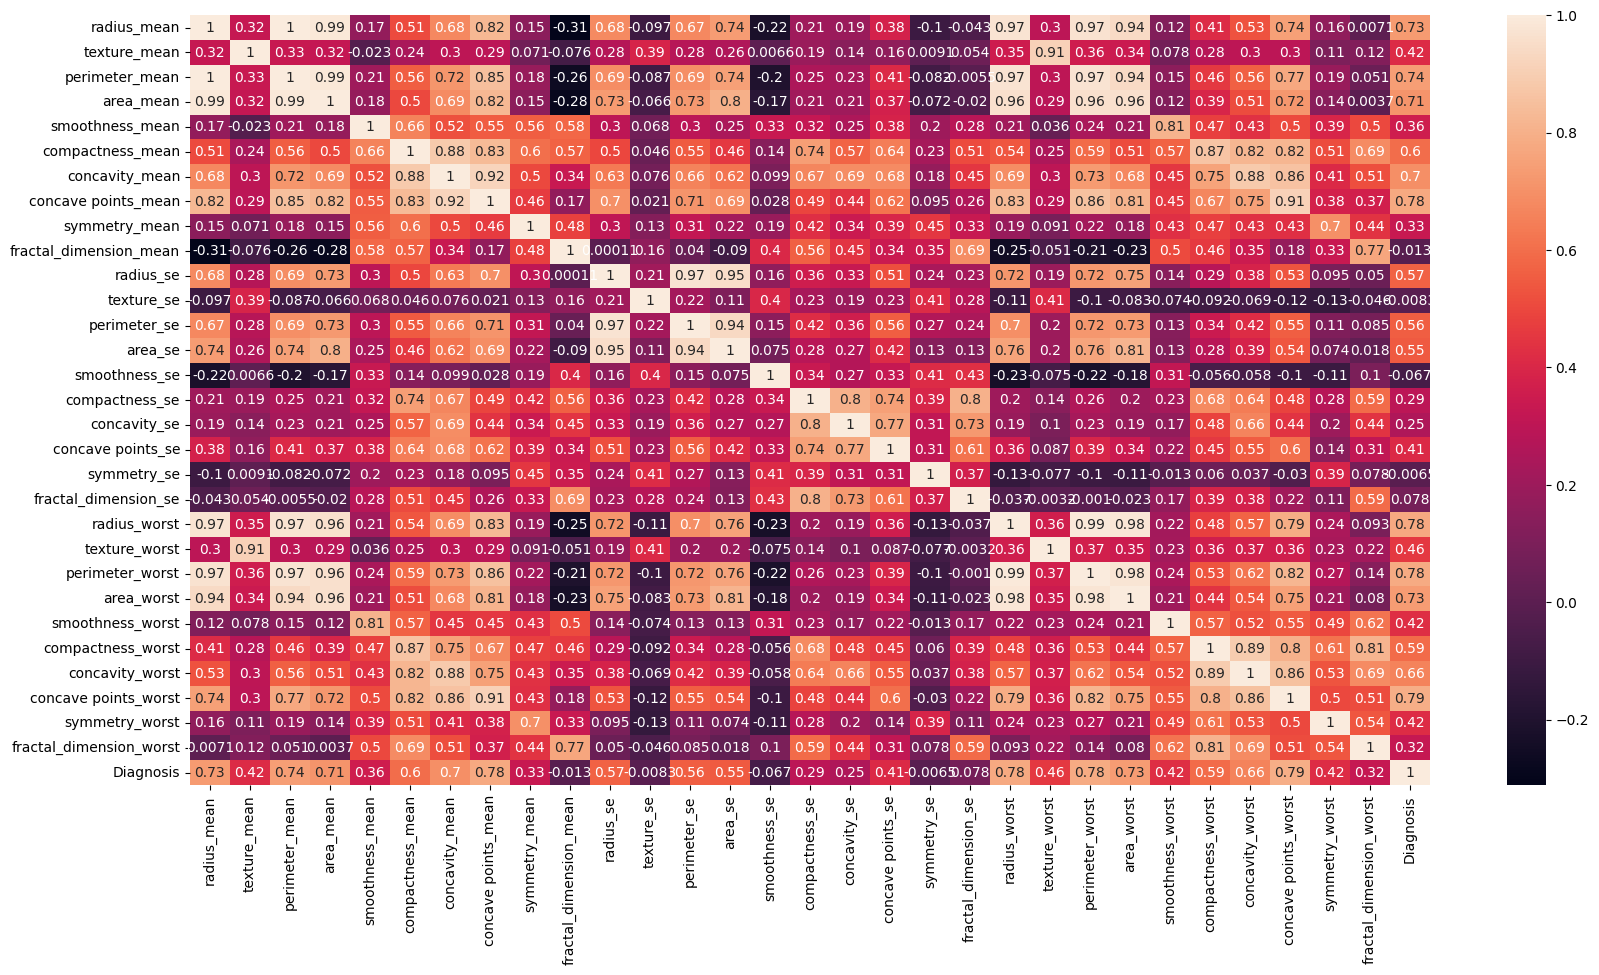

In [ ]:
# TO check for correlation
plt.figure(figsize=(20,10))
sn.heatmap(data2.corr(), annot=True)
plt.show()

## MODEL TRAINING

In [ ]:

#droping diagnosis as it is target
x=data2.drop(["Diagnosis"],axis=1)
y=data2["Diagnosis"]


In [ ]:
# spliting the data for test and train
X_1, X_test, y_1, y_test = train_test_split(x,y,test_size = 0.20, random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size = 0.15, random_state = 10)


In [ ]:
ACCURACY=[]
PRECISION=[]
RECALL=[]
TRUE_POSITIVE=[]
TRUE_NEGATIVE=[]
FALSE_POSITIVE=[]
FALSE_NEGATIVE=[]

In [ ]:
# Stochastic gradient classifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)
y_pred=sgd_clf.predict(X_test)



In [ ]:
#function for accuracy
def all_accuracy_s(y_pred,y_test):
    accuracy = accuracy_score(y_pred, y_test)
    c_m=confusion_matrix(y_test,y_pred)
    p_s=precision_score(y_test,y_pred)
    r_s=recall_score(y_test,y_pred)
    return accuracy,c_m,p_s,r_s
acc,c_mm,p_ss,r_ss=all_accuracy_s(y_pred,y_test)
ACCURACY.append(acc)
print("accuracy of stochastic_gradient_classifier",acc)
print("confusion matrix for stochastic_gradient_classifier ",c_mm)
TRUE_POSITIVE.append(c_mm[1][1])
TRUE_NEGATIVE.append(c_mm[0][0])
FALSE_POSITIVE.append(c_mm[0][1])
FALSE_NEGATIVE.append(c_mm[1][0])
print("precision_score for stochastic_gradient_classifier ",p_ss)
PRECISION.append(p_ss)
print("recall_score for stochastic_gradient_classifier ",r_ss)
RECALL.append(r_ss)

accuracy of stochastic_gradient_classifier 0.9298245614035088


In [ ]:
# KNN CLASSIFIER
def trainKNN(X_train, y_train, k):
    classifier = KNeighborsClassifier(n_neighbors=k, n_jobs = -1)
    classifier.fit(X_train,y_train)
    return classifier


In [ ]:
def predictClassifier(X_test, classifier):
    y_pred = classifier.predict(X_test)
    return y_pred


In [ ]:

kvalues = [x for x in range(1,50, 6)]
AccuracyList =[]
for k in tqdm(kvalues):
    knnClassifier = trainKNN(X_train, y_train, k)
    y_pred = predictClassifier(X_cv, knnClassifier)
    accs,t1,t2,t3 = all_accuracy_s(y_pred, y_cv)
    AccuracyList.append(accs)
AccuracyList

100%|██████████| 9/9 [00:00<00:00, 18.85it/s]


[0.9420289855072463,
 0.9565217391304348,
 0.9420289855072463,
 0.9420289855072463,
 0.9420289855072463,
 0.9420289855072463,
 0.9420289855072463,
 0.9420289855072463,
 0.927536231884058]

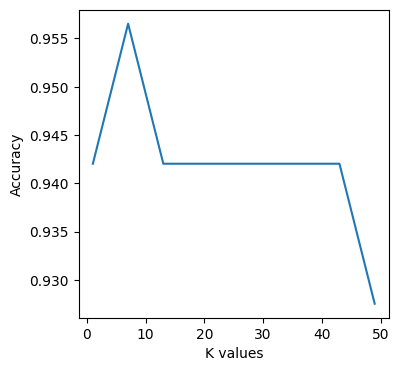

In [ ]:
f = plt.figure(figsize = (4,4))
ax = plt.subplot()
plt.plot(kvalues,AccuracyList)
ax.set_xlabel('K values', fontsize = 10)
ax.set_ylabel('Accuracy', fontsize = 10)
plt.show()

In [ ]:
clf = trainKNN(X_train,y_train, 7)
y_pred = predictClassifier(X_test, knnClassifier)
acc,c_mm,p_mm,r_ss = all_accuracy_s(y_pred, y_test)
ACCURACY.append(acc)
print(" Accuracy for KNN: ",acc)
print("confusion matrix for KNN ",c_mm)
TRUE_POSITIVE.append(c_mm[1][1])
TRUE_NEGATIVE.append(c_mm[0][0])
FALSE_POSITIVE.append(c_mm[0][1])
FALSE_NEGATIVE.append(c_mm[1][0])
print("precision_score for KNN ",p_ss)
PRECISION.append(p_ss)
print("recall_score for KNN",r_ss)
RECALL.append(r_ss)

 Accuracy for KNN:  0.9122807017543859
confusion matrix for KNN  [[73  2]
 [ 8 31]]
precision_score for KNN  0.918918918918919
recall_score for KNN 0.7948717948717948


In [ ]:
# SVM

params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
               {'kernel' : ['poly'],'degree':[2,3,4],'C':[3,4,5,6]}]

In [ ]:
# grid search cv is used for optimisation
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_1, y_1)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [3, 4, 5, 6], 'degree': [2, 3, 4],
                          'kernel': ['poly']}])

In [ ]:
svm_model.best_estimator_

SVC(C=100, kernel='linear')

In [ ]:
svm_model.best_score_

0.956043956043956

In [ ]:
bestModel = svm_model.best_estimator_
bestModel.fit(X_train,y_train)


SVC(C=100, kernel='linear')

In [ ]:
yPred = bestModel.predict(X_test)
acc,c_mm,p_mm,r_mm = all_accuracy_s(y_test,yPred)
ACCURACY.append(acc)
print(" Accuracy for SVM: ",acc)
print("confusion matrix for SVM ",c_mm)
TRUE_POSITIVE.append(c_mm[1][1])
TRUE_NEGATIVE.append(c_mm[0][0])
FALSE_POSITIVE.append(c_mm[0][1])
FALSE_NEGATIVE.append(c_mm[1][0])
print("precision_score for SVM ",p_ss)
PRECISION.append(p_ss)
print("recall_score for SVM",r_ss)
RECALL.append(r_ss)

 Accuracy for SVM:  0.9298245614035088
confusion matrix for SVM  [[68  1]
 [ 7 38]]
precision_score for SVM  0.918918918918919
recall_score for SVM 0.7948717948717948


In [ ]:
#Logistic regression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=log_reg.predict(X_test)
acc,c_mm,p_mm,r_mm = all_accuracy_s(y_test,y_pred)
print(" Accuracy for SVM: ",acc)
ACCURACY.append(acc)
print("confusion matrix for SVM ",c_mm)
TRUE_POSITIVE.append(c_mm[1][1])
TRUE_NEGATIVE.append(c_mm[0][0])
FALSE_POSITIVE.append(c_mm[0][1])
FALSE_NEGATIVE.append(c_mm[1][0])
print("precision_score for SVM ",p_ss)
PRECISION.append(p_ss)
print("recall_score for SVM",r_ss)
RECALL.append(r_ss)

 Accuracy for SVM:  0.9298245614035088
confusion matrix for SVM  [[70  3]
 [ 5 36]]
precision_score for SVM  0.918918918918919
recall_score for SVM 0.7948717948717948


In [ ]:
# decision_trees_classifier
def trainDCLF(X_train, y_train, k):
  tree_clf=DecisionTreeClassifier(max_depth=k)
  tree_clf.fit(X_train,y_train)
  return tree_clf



In [ ]:
AccuracyList = {}
for k in range(1,10):
    Dclf = trainDCLF(X_train, y_train, k)
    y_pred = predictClassifier(X_cv, Dclf)
    accs,t1,t2,t3 = all_accuracy_s(y_pred, y_cv)
    AccuracyList[k]=accs
AccuracyList

{1: 0.9565217391304348,
 2: 1.0,
 3: 0.9710144927536232,
 4: 0.9710144927536232,
 5: 0.9855072463768116,
 6: 0.9855072463768116,
 7: 0.9855072463768116,
 8: 0.9565217391304348,
 9: 0.9710144927536232}

In [ ]:
tree_dclf=DecisionTreeClassifier(max_depth=2)
tree_dclf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
y_pred=tree_dclf.predict(X_test)
acc,c_mm,p_mm,r_mm = all_accuracy_s(y_test,y_pred)
print(" Accuracy for Decision_tree_classifier: ",acc)
ACCURACY.append(acc)
print("confusion matrix for Decision_tree_classifier ",c_mm)
TRUE_POSITIVE.append(c_mm[1][1])
TRUE_NEGATIVE.append(c_mm[0][0])
FALSE_POSITIVE.append(c_mm[0][1])
FALSE_NEGATIVE.append(c_mm[1][0])
print("precision_score for Decision_tree_classifier ",p_ss)
PRECISION.append(p_ss)
print("recall_score for Decision_tree_classifier ",r_ss)
RECALL.append(r_ss)

 Accuracy for Decision_tree_classifier:  0.9210526315789473
confusion matrix for Decision_tree_classifier  [[71  5]
 [ 4 34]]
precision_score for Decision_tree_classifier  0.918918918918919
recall_score for Decision_tree_classifier  0.7948717948717948


In [ ]:
#random forest classifier
rnd_clf=RandomForestClassifier()
rnd_clf.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
y_pred=rnd_clf.predict(X_test)
acc,cmm,p_mm,r_mm = all_accuracy_s(y_test,y_pred)
print(" Accuracy for RANDOMN_tree_classifier: ",acc)
ACCURACY.append(acc)
print("confusion matrix for RANDOMN_tree_classifier ",c_mm)
TRUE_POSITIVE.append(c_mm[1][1])
TRUE_NEGATIVE.append(c_mm[0][0])
FALSE_POSITIVE.append(c_mm[0][1])
FALSE_NEGATIVE.append(c_mm[1][0])
print("precision_score for RANDOMN_tree_classifier ",p_ss)
PRECISION.append(p_ss)
print("recall_score for RANDOMN_tree_classifier ",r_ss)
RECALL.append(r_ss)

 Accuracy for RANDOMN_tree_classifier:  0.9736842105263158
confusion matrix for RANDOMN_tree_classifier  [[71  5]
 [ 4 34]]
precision_score for RANDOMN_tree_classifier  0.918918918918919
recall_score for RANDOMN_tree_classifier  0.7948717948717948


# RESULTS


In [ ]:
list1=["SGD ","KNN ","SVM","LOGISTIC REGRESSION","DECISION TREE","RANDOMN FOREST"]
FINAL = {"CLASSIFIER":list1,"ACCURACY":ACCURACY,"PRECISION":PRECISION,"RECALL":RECALL,"TRUE_POSITIVE":TRUE_POSITIVE,"TRUE_NEGATIVE":TRUE_NEGATIVE,"FALSE_POSITIVE":FALSE_POSITIVE,"FALSE_NEGATIVE":FALSE_NEGATIVE}
final=pd.DataFrame(FINAL)
final

,CLASSIFIER,ACCURACY,PRECISION,RECALL,TRUE_POSITIVE,TRUE_NEGATIVE,FALSE_POSITIVE,FALSE_NEGATIVE
0,SGD,0.929825,0.918919,0.871795,34,72,3,5
1,KNN,0.912281,0.918919,0.794872,31,73,2,8
2,SVM,0.929825,0.918919,0.794872,38,68,1,7
3,LOGISTIC REGRESSION,0.929825,0.918919,0.794872,36,70,3,5
4,DECISION TREE,0.921053,0.918919,0.794872,34,71,5,4
5,RANDOMN FOREST,0.973684,0.918919,0.794872,34,71,5,4


# Randomn forest algorithm gives the best accuracy of 97.36%